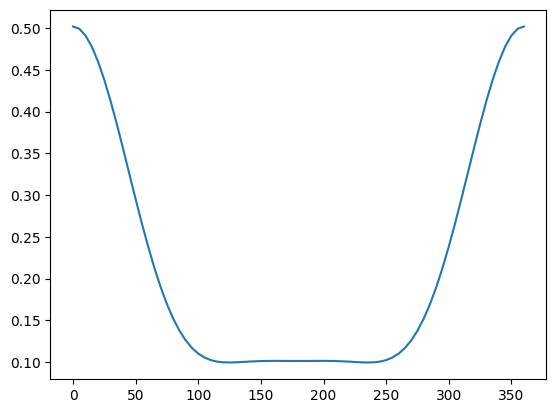

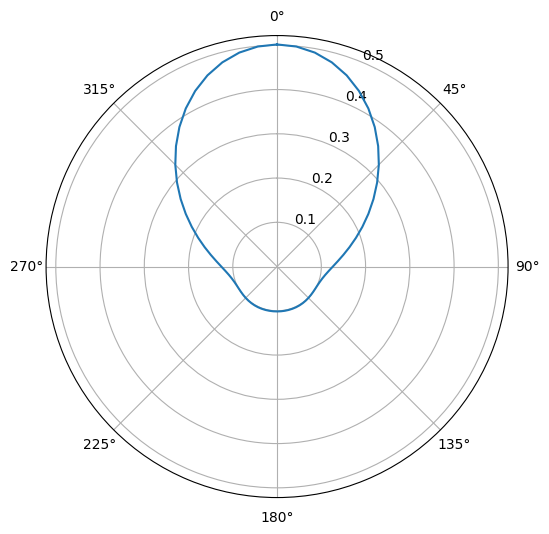

In [1]:
# Read out file from one specific example. In this case Cube.

import matplotlib.pyplot as plt
import numpy as np

data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']
extracted_data = []

# This part of the code transforms the date from the w000r000.avg file into a data dictionary
with open('/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_CUBE/w000r000.avg', 'r') as file:
    data_section_started = False
    for line in file:
        # Check if the data section has started
        if data_start_marker in line:
            data_section_started = True
            continue  # Skip the header line
        
        if data_section_started:
            # Check if we've reached the end of the data section
            if line.strip() == "":
                break  # Exit the loop if an empty line is found
            
            # Split the line into components and extract the desired data
            parts = line.split()
            data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
            extracted_data.append(data_row)

# Once the data is as a dictionary it needs to be transformed into a Data Frame         
# pip install pandas
import pandas as pd
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(extracted_data)
# Convert string numbers to float if needed
df = df.astype(float)
#Display Data as a table
df

#Plot data in Cartessian coodinates 
plt.plot(df[df["phi"]==0]["theta"],df[df["phi"]==0]["S_11"])

#Plot data in Polar Plot
# Convert 'theta' from degrees to radians for the polar plot
theta_radians = np.radians(df[df["phi"] == 0]["theta"].astype(float))
# 'S_11' values
s_11_values = df[df["phi"] == 0]["S_11"].astype(float)
# Create a polar plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
# Scatter plot on polar coordinates
ax.plot(theta_radians, s_11_values)
# Set the theta direction to clockwise and start position (0 degrees) at the top
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.show()


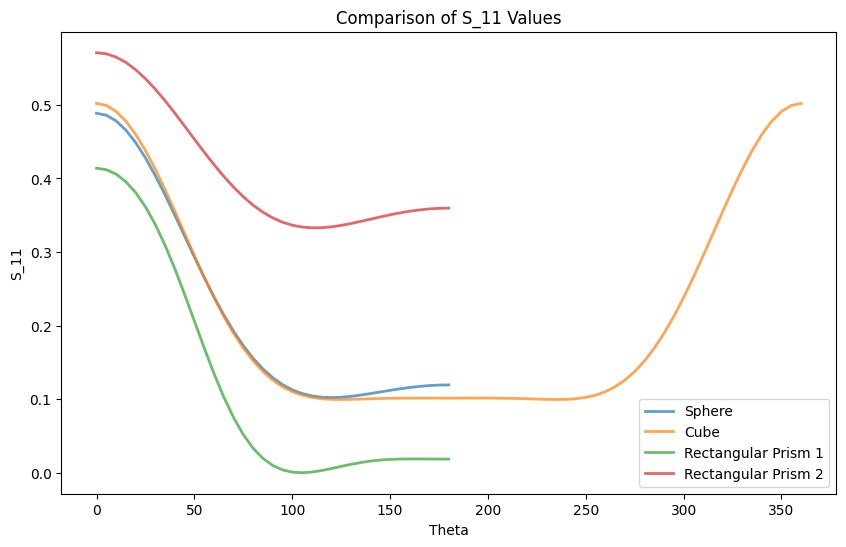

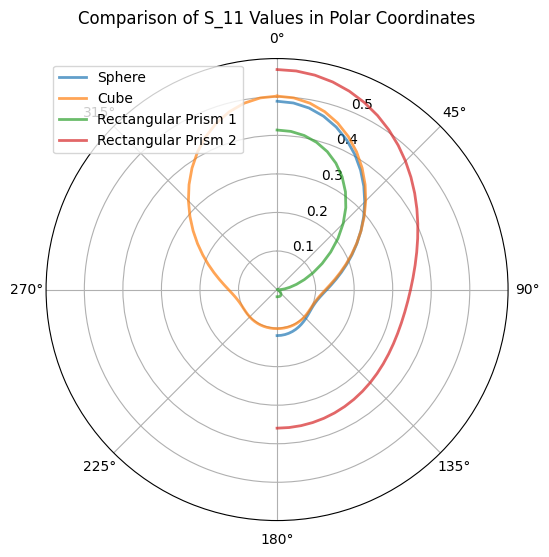

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def extract_data(file_path):
    """
    Extracts data from the given file path.
    Parameters:
    - file_path: Path to the file from which to extract data.
    Returns:
    - DataFrame containing extracted data.
    """
    data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
    extracted_data = []
    with open(file_path, 'r') as file:
        data_section_started = False
        for line in file:
            if data_start_marker in line:
                data_section_started = True
                continue
            if data_section_started and line.strip() == "":
                break
            if data_section_started:
                parts = line.split()
                data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
                extracted_data.append(data_row)
    df = pd.DataFrame(extracted_data)
    return df.astype(float)

# Define the columns of interest (for readability, though not necessary to redefine)
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']

# Paths to the files
file1_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_SPHERE/w000r000.avg'
file2_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_CUBE/w000r000.avg' 
file3_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_RECTANGLE1/w000r000.avg' 
file4_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_RECTANGLE2/w000r000.avg' 

# Extract data from both files
df1 = extract_data(file1_path)
df2 = extract_data(file2_path)
df3 = extract_data(file3_path)
df4 = extract_data(file4_path)

# Plot data in Cartesian coordinates for both datasets
plt.figure(figsize=(10, 6))
plt.plot(df1[df1["phi"] == 0]["theta"], df1[df1["phi"] == 0]["S_11"], label='Sphere', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
plt.plot(df2[df2["phi"] == 0]["theta"], df2[df2["phi"] == 0]["S_11"], label='Cube', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
plt.plot(df3[df3["phi"] == 0]["theta"], df3[df3["phi"] == 0]["S_11"], label='Rectangular Prism 1', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
plt.plot(df4[df4["phi"] == 0]["theta"], df4[df4["phi"] == 0]["S_11"], label='Rectangular Prism 2', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
plt.xlabel('Theta')
plt.ylabel('S_11')
plt.title('Comparison of S_11 Values')
plt.legend()
plt.show()

# Polar Plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
# Convert 'theta' from degrees to radians for the polar plot
theta_radians_1 = np.radians(df1[df1["phi"] == 0]["theta"].astype(float))
s_11_values_1 = df1[df1["phi"] == 0]["S_11"].astype(float)
theta_radians_2 = np.radians(df2[df2["phi"] == 0]["theta"].astype(float))
s_11_values_2 = df2[df2["phi"] == 0]["S_11"].astype(float)
theta_radians_3 = np.radians(df3[df3["phi"] == 0]["theta"].astype(float))
s_11_values_3 = df3[df3["phi"] == 0]["S_11"].astype(float)
theta_radians_4 = np.radians(df4[df4["phi"] == 0]["theta"].astype(float))
s_11_values_4 = df4[df4["phi"] == 0]["S_11"].astype(float)
# Scatter plot on polar coordinates for both datasets
ax.plot(theta_radians_1, s_11_values_1, label='Sphere', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
ax.plot(theta_radians_2, s_11_values_2, label='Cube', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
ax.plot(theta_radians_3, s_11_values_3, label='Rectangular Prism 1', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
ax.plot(theta_radians_4, s_11_values_4, label='Rectangular Prism 2', alpha=0.7, markersize=5, linestyle='-', linewidth=2)
# Set the theta direction to clockwise and start position (0 degrees) at the top
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.title('Comparison of S_11 Values in Polar Coordinates')
plt.legend(loc='upper left')
plt.show()


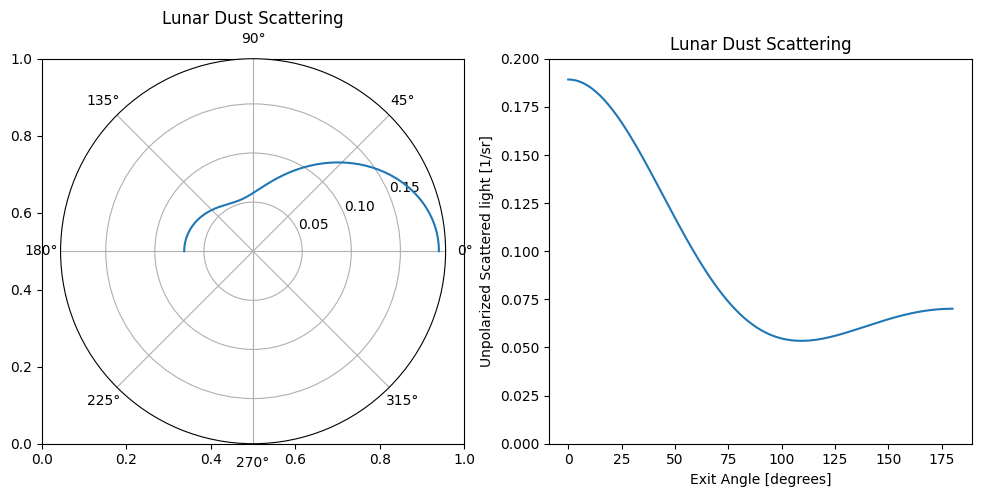

In [41]:
# Ensure that the following extensions are downloaded: numpy, miepython and matplotlib
# Otherwise uncomment the following lines
# pip install numpy
# pip install matplotlib
# pip install miepython

import numpy as np
import miepython as mie
import matplotlib.pyplot as plt

# Adjusted parameters for lunar dust
m_particle = 1.56 + 0.003j  # Complex refractive index of lunar dust
wavelength = 0.628  # Wavelength of light in micrometers (for a visible range)
particle_radius = 0.1  # Radius of the lunar dust particle in micrometers
m_medium = 1  # Refractive index of vacuum

# Calculate relative refractive index and size parameter
m_relative = m_particle / m_medium
x = 2 * np.pi * particle_radius / wavelength

# Define the scattering angles
theta_mie = np.linspace(0, 180, 180)  # Considering only forward scattering
mu = np.cos(theta / 180 * np.pi)

# Calculate scattered intensity
scat_mie = mie.i_unpolarized(m_relative, x, mu)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Polar plot
ax = plt.subplot(121, projection='polar')
ax.plot(theta_mie / 180 * np.pi, scat_mie)
ax.set_rticks([0.05, 0.1, 0.15])
ax.set_title("Lunar Dust Scattering")

# Cartesian plot
plt.subplot(122)
plt.plot(theta_mie, scat_mie)
plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Unpolarized Scattered light [1/sr]')
plt.title('Lunar Dust Scattering')
plt.ylim(0.00, 0.2)

plt.show()

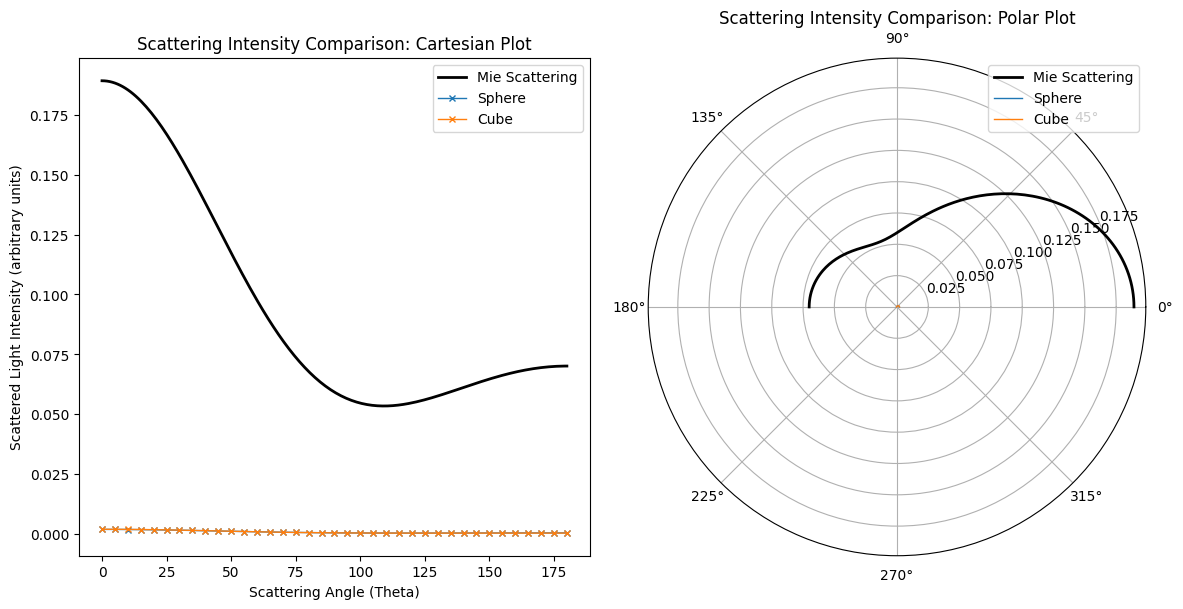

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
wavelength = 0.560  # Wavelength of light in micrometers
k = 2 * np.pi / wavelength  # Wave number

# Assuming df1, df2, ... contain your DDSCAT data
# Mie scattering data (theta_mie, scat_mie) is from your previous code

# Transform S11 for a meaningful comparison
df1['I_scat'] = df1['S_11'] / (2 * k**2)
df2['I_scat'] = df2['S_11'] / (2 * k**2)
# Repeat for df3, df4 as needed

plt.figure(figsize=(12, 6))

# Cartesian Plot for Quantitative Comparison
plt.subplot(1, 2, 1)
plt.plot(theta_mie, scat_mie, label='Mie Scattering', color='black', linestyle='-', linewidth=2)
plt.plot(df1[df1["phi"] == 0]["theta"], df1[df1["phi"] == 0]['I_scat'], label='Sphere', linestyle='-', marker='x', linewidth=1, markersize=5)
plt.plot(df2[df2["phi"] == 0]["theta"], df2[df2["phi"] == 0]['I_scat'], label='Cube', linestyle='-', marker='x', linewidth=1, markersize=5)
# Add plots for df3, df4 as necessary
plt.xlabel('Scattering Angle (Theta)')
plt.ylabel('Scattered Light Intensity (arbitrary units)')
plt.title('Scattering Intensity Comparison: Cartesian Plot')
plt.legend()

# Polar Plot for Quantitative Comparison
plt.subplot(1, 2, 2, projection='polar')
plt.plot(np.radians(theta_mie), scat_mie, label='Mie Scattering', color='black', linestyle='-', linewidth=2)
plt.plot(np.radians(df1[df1["phi"] == 0]["theta"]), df1[df1["phi"] == 0]['I_scat'], label='Sphere', linestyle='-', linewidth=1, markersize=5)
plt.plot(np.radians(df2[df2["phi"] == 0]["theta"]), df2[df2["phi"] == 0]['I_scat'], label='Cube', linestyle='-', linewidth=1, markersize=5)
# Add plots for df3, df4 as necessary
plt.title('Scattering Intensity Comparison: Polar Plot')
plt.legend()

plt.tight_layout()
plt.show()
